In [1]:
from scipy.io import readsav
import matplotlib.pyplot as plt
import numpy as np
import sunpy.map

## IDL

In [2]:
sav_filename="data_IDL/IDL_data.sav"

In [3]:
sav_data=readsav(sav_filename)

In [4]:
image_data=sav_data['out_data']

In [5]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))
print('Sum:', np.sum(image_data))

Min: -23
Max: 8747
Mean: 49.2668896317482
Stdev: 57.42581031270635
Sum: 826561249


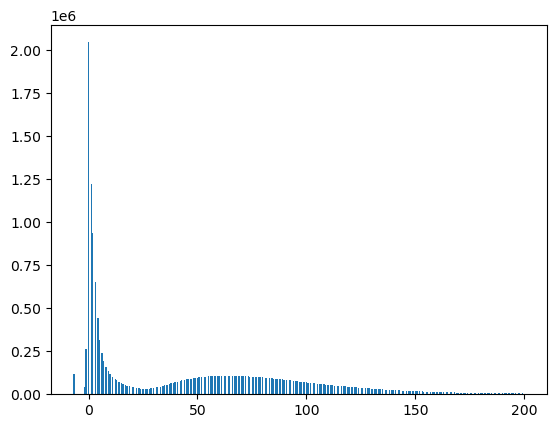

In [6]:
flat_IDL=image_data.flatten()
fig,ax = plt.subplots();
ax.hist(flat_IDL,bins='auto',range=(-7,200));

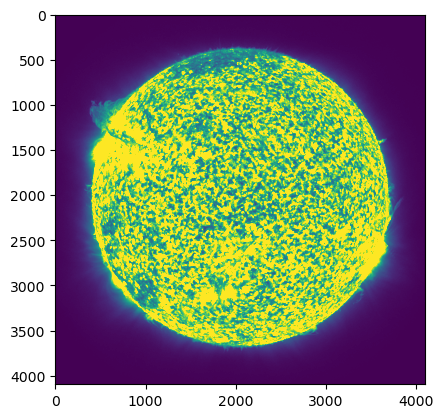

In [7]:
fig,ax = plt.subplots()
ax.imshow(image_data,vmax=100,vmin=0)

In [69]:
image_data.sum()

826561249

## aiapy nonnormalized

In [70]:
npzfile=np.load("data/AIA/image_data_4096_nonnormal.npz")

In [71]:
image_data_aiapy=npzfile['image_data']

In [72]:
image_data_aiapy.sum()

834241546

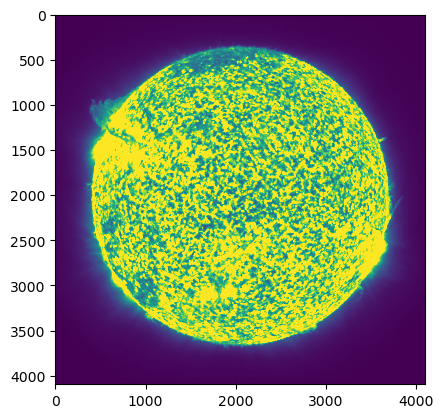

In [73]:
fig,ax = plt.subplots()
ax.imshow(image_data_aiapy,vmax=100,vmin=0)

In [74]:
print('Min:', np.min(image_data_aiapy))
print('Max:', np.max(image_data_aiapy))
print('Mean:', np.mean(image_data_aiapy))
print('Stdev:', np.std(image_data_aiapy))
print('Sum:', np.sum(image_data_aiapy))

Min: -7
Max: 8428
Mean: 49.7246710062027
Stdev: 57.503275938342284
Sum: 834241546


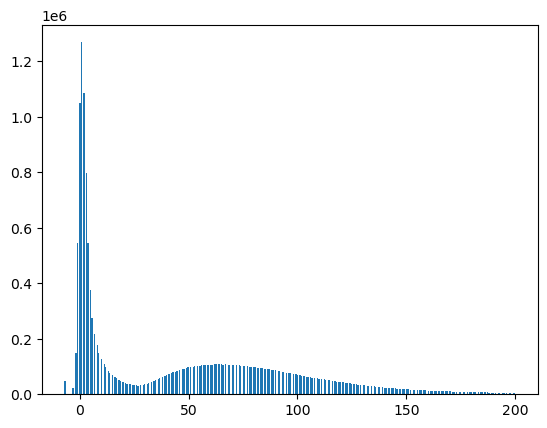

In [75]:
flat_nonnormal=image_data_aiapy.flatten()
fig,ax = plt.subplots();
ax.hist(flat_nonnormal,bins='auto',range=(-7,200));

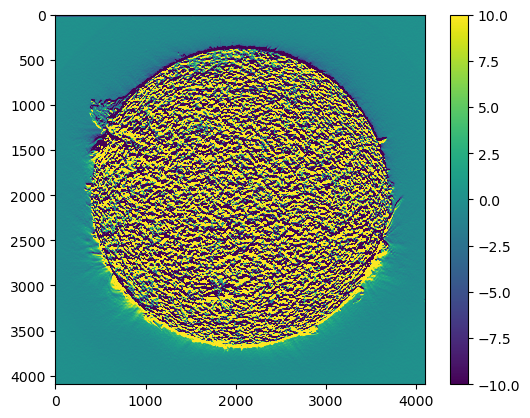

In [76]:
fig,ax = plt.subplots()
sc=ax.imshow(image_data-image_data_aiapy,vmax=10,vmin=-10)
fig.colorbar(sc)

In [77]:
test=image_data-image_data_aiapy

In [78]:
a,b=np.where(abs(test)>10)
a.shape

(6705593,)

## sunpy map

In [79]:
AIA_filename="data/AIA/aia_lev1_304a_2011_01_27t22_58_56_12z_image_lev1.fits"
m_aia=sunpy.map.Map(AIA_filename)

In [80]:
test2=image_data-m_aia.data
a,b=np.where(abs(test2)>10)
a.shape

(7096995,)

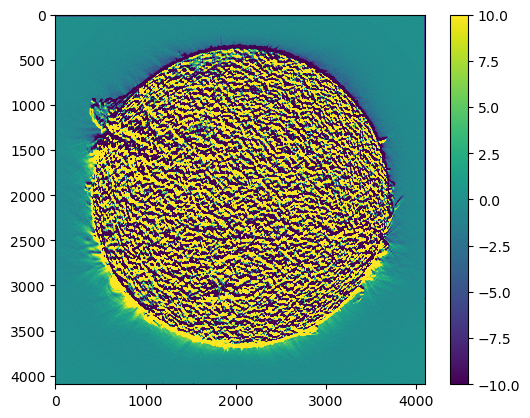

In [81]:
fig,ax = plt.subplots()
sc=ax.imshow(image_data-m_aia.data,vmax=10,vmin=-10)
fig.colorbar(sc)

有微小的差异